In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Bank Churn.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
data_exited_1 = data[data['Exited'] == 1]
data_exited_0 = data[data['Exited'] == 0]

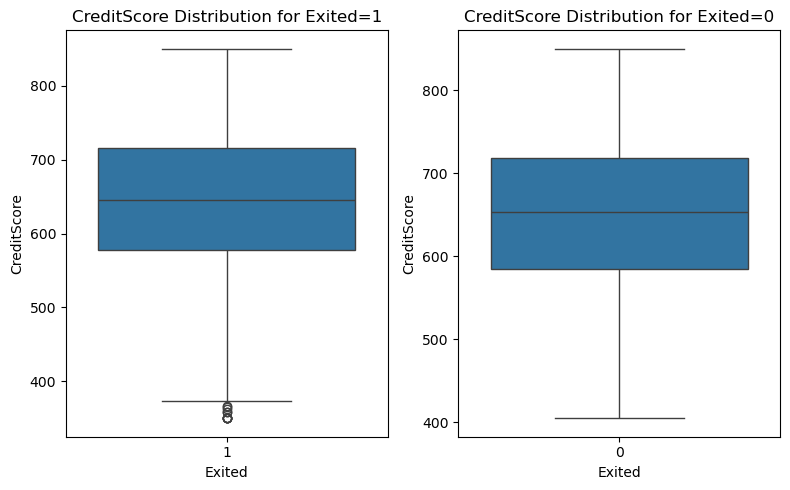

In [7]:
# Create box-whisker plots for 'CreditScore' for each group
# Create a figure with two subplots for the box plots
plt.figure(figsize=(8, 5))
# Box plot for Exited=1
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='CreditScore', data=data_exited_1)
plt.title('CreditScore Distribution for Exited=1')
# Box plot for Exited=0
plt.subplot(1, 2, 2)
sns.boxplot(x='Exited', y='CreditScore', data=data_exited_0)
plt.title('CreditScore Distribution for Exited=0')
# Adjust the layout
plt.tight_layout()
# Show the plots
plt.show()

In [8]:
# Calculate skewness for each group
skewness_exited_1 = stats.skew(data_exited_1['CreditScore'])
skewness_exited_0 = stats.skew(data_exited_0['CreditScore'])
print(f"Skewness for Exited=1: {skewness_exited_1:.2f}")
print(f"Skewness for Exited=0: {skewness_exited_0:.2f}")

Skewness for Exited=1: -0.14
Skewness for Exited=0: -0.05


In [9]:
summary_credit_score = data.groupby('Exited')['CreditScore'].agg(['count',
'mean'])
# Rename the columns for clarity
summary_credit_score = summary_credit_score.rename(columns={
'count': 'Count',
'mean': 'Mean'})
summary_credit_score.round(2)

,Count,Mean
Exited,,
0,7963,651.85
1,2037,645.35


In [14]:
# Create a cross table of 'Geography' vs. 'Exited' with counts
cross_table = pd.crosstab(data['Geography'], data['Exited'], margins=True, margins_name='Total')
# Calculate proportions
cross_table_proportions = cross_table.div(cross_table['Total'], axis=0) *100
# Rename the columns for clarity
cross_table = cross_table.rename(columns={0: 'Not Exited', 1: 'Exited'})
cross_table_proportions = cross_table_proportions.rename(columns={0: 'Not Exited (%)', 1: 'Exited (%)'})

In [15]:
# Display the cross table and proportions
print("Cross Table (Counts):\n")
print(cross_table)
print("\nCross Table (Proportions):\n")
print(cross_table_proportions.round(2))

Cross Table (Counts):

Exited     Not Exited  Exited  Total
Geography                           
France           4204     810   5014
Germany          1695     814   2509
Spain            2064     413   2477
Total            7963    2037  10000

Cross Table (Proportions):

Exited     Not Exited (%)  Exited (%)  Total
Geography                                   
France              83.85       16.15  100.0
Germany             67.56       32.44  100.0
Spain               83.33       16.67  100.0
Total               79.63       20.37  100.0


In [16]:
correlation_coefficient = data['CreditScore'].corr(data['EstimatedSalary']
)
correlation_coefficient.round(4)

-0.0014

In [17]:
data['CreditScore_Cat'] = np.where(data['CreditScore']>=650,1,0)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1


In [19]:
# Create a cross table of 'CreditScore_Cat' vs. 'Exited' with counts, excluding the "Total" row
cross_table = pd.crosstab(data['CreditScore_Cat'], data['Exited'], margins
=False)
# Calculate proportions
cross_table_proportions = (cross_table.div(cross_table.sum(axis=1), axis=0
) * 100).round(2)
# Rename the columns for clarity
cross_table.columns = ['Not Exited', 'Exited']
cross_table_proportions.columns = ['Not Exited (%)', 'Exited (%)']
# Concatenate the counts and proportions side by side
result_table = pd.concat([cross_table, cross_table_proportions], axis=1)
# Display the combined table
print(result_table)

                 Not Exited  Exited  Not Exited (%)  Exited (%)
CreditScore_Cat                                                
0                      3851    1049           78.59       21.41
1                      4112     988           80.63       19.37


In [22]:
# Sort the data by 'CreditScore' in descending order and select the top 300 rows
top_300_customers = data.sort_values(by='CreditScore', ascending=False).head(300)
# Create a cross table to check the distribution of these customers over 'Geography'
geo_distribution_top_300 = pd.crosstab(top_300_customers['Geography'], columns='Count')
# Display the cross table
print("Geography Distribution of Top 500 Customers:")
print(geo_distribution_top_300)

Geography Distribution of Top 500 Customers:
col_0      Count
Geography       
France       150
Germany       80
Spain         70


In [23]:
# Group the data by 'Geography' and 'Gender', and calculate count, mean, and median for 'CreditScore'
summary_credit_score = data.groupby(['Geography', 'Gender'])['CreditScore'].agg(['count', 'mean', 'median'])
# Reset the index to make the result more readable
summary_credit_score = summary_credit_score.reset_index()
# Rename the columns for clarity
summary_credit_score = summary_credit_score.rename(columns={
'count': 'Count',
'mean': 'Mean',
'median': 'Median'
})
# Display the summary
print(summary_credit_score)

  Geography  Gender  Count        Mean  Median
0    France  Female   2261  649.185759   652.0
1    France    Male   2753  650.064657   653.0
2   Germany  Female   1193  653.093881   651.0
3   Germany    Male   1316  649.966565   650.5
4     Spain  Female   1089  651.769513   653.0
5     Spain    Male   1388  650.992075   650.0


  Geography  NumOfProducts
0    France           7676
1   Germany           3813
2     Spain           3813


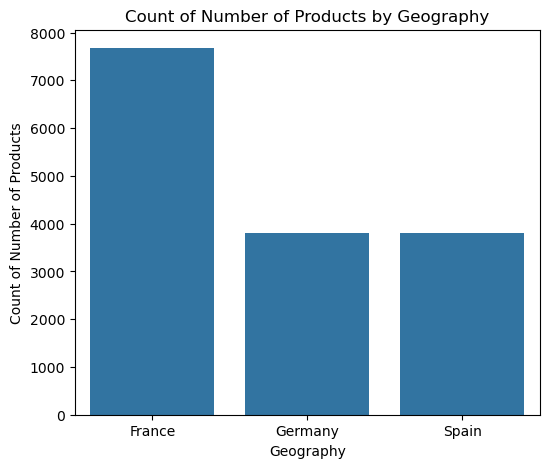

In [24]:
# Count the number of products for each combination of Geography
product_count_by_geography = data.groupby('Geography')['NumOfProducts'].sum().reset_index()
print(product_count_by_geography)
# Create a bar plot to show the count of number of products by Geography
plt.figure(figsize=(6, 5))
sns.barplot(x='Geography', y='NumOfProducts', data=product_count_by_geography)
plt.title('Count of Number of Products by Geography')
plt.xlabel('Geography')
plt.ylabel('Count of Number of Products')
plt.show()